<a href="https://colab.research.google.com/github/AmazaspShumik/BayesianML-MCMC/blob/master/failures_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Issue 1: Outliers

One of the main problems with the Linear Regression is its sensitivity to outliers, even small number of outliers can significantly bias estimated value of coefficients.


Model coefficient 2.1783730030066066
True coefficient 3.0


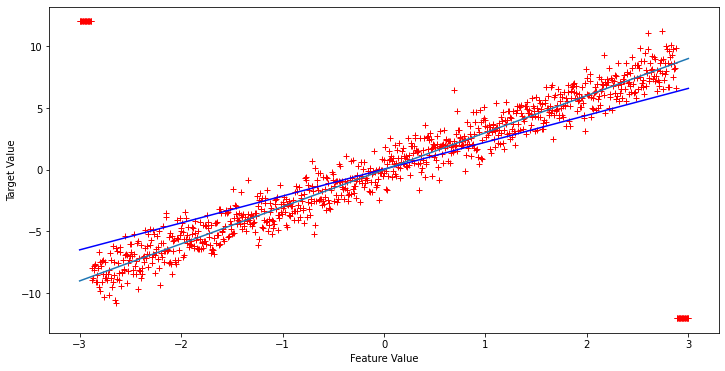

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time

N_SAMPLES = 1000

# simulating data 
x = np.zeros([N_SAMPLES,1])
x[:,0] = np.linspace(-3,3,N_SAMPLES)
y = 3*x[:,0] + np.random.normal(size=N_SAMPLES)

# effect of outliers
y[0:20] = 12
y[-20:] = -12

# fitting the model
lr_outliers = LinearRegression(fit_intercept=True)
lr_outliers.fit(x, y)
print("\nModel coefficient {0}".format(lr_outliers.coef_[0]))
print("True coefficient {0}".format(3.0))

# plot data + model preds
plt.figure(1, figsize=(12,6))
plt.plot(x[:,0], y, "r+")
plt.plot(x[:,0], lr_outliers.predict(x), "b-", label="predictions")
plt.plot(x[:,0], 3*x[:,0], )
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.show()

# Issue 2: Overfitting

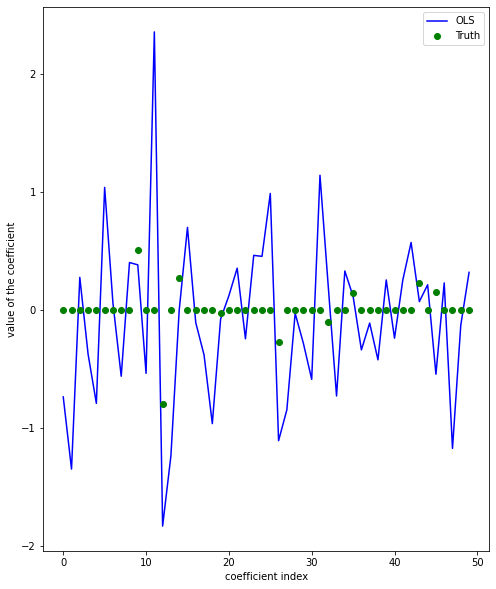

In [2]:
from sklearn.model_selection import train_test_split
import scipy

# Generate Data Matrix with highly correlated features, fix seed =0
n_samples, n_features = 100, 50
np.random.seed(0) 
X  = np.random.random([n_samples,n_features])
        
# Create weigts with a precision lambda_ of 4.
lambda_ = 5.
w = np.zeros(n_features)

# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
  w[i] = scipy.stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = np.random.normal(0,1,n_samples)

# Create the target
Y = np.dot(X, w) + noise
X,x,Y,y   = train_test_split(X,Y, test_size = 0.2, random_state = 1)

# Fit OLS and different versions of bayesian regression
ols = LinearRegression(fit_intercept=True)
ols.fit(X,Y)

# Two  subplots sharing both x/y axes
f, (ax1) = plt.subplots(1, sharex=True, sharey=False, figsize = (8,10))
    
ax1.plot(ols.coef_,'b-',label = 'OLS')
ax1.plot(w,'go',label = 'Truth')
ax1.set_xlabel("coefficient index")
ax1.set_ylabel("value of the coefficient")
ax1.legend()
plt.show()

# Note that coefficients of Ordinary Least Squares are large 
# for a lot of features which are pure noise. Model is overfitting by 
# assigning non-zero weight to irrelevant 

Text(0.5, 1.0, 'Overfitting')

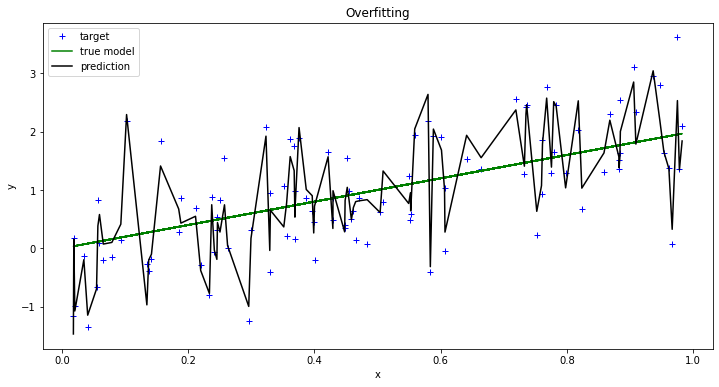

In [8]:
n_samples, n_features = 100, 80
x = np.random.random([n_samples, n_features])
coef = np.zeros(n_features)
coef[0] = 2
y = x@coef + np.random.normal(size=n_samples)

# fit & predictions
lr = LinearRegression()
preds = lr.fit(x, y).predict(x)

plt.figure(2, figsize=(12,6))
plt.plot(x[:,0], y, "b+", label="target")
plt.plot(x[:,0], x[:,0]*2, "g-", label="true model")
sorted_indices = np.argsort(x[:,0])
plt.plot(x[:,0][sorted_indices], preds[sorted_indices], "k-", label="prediction")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("")


# Note that model uses noisy features that are irrelevant to approximate target
# variable and hence significantly ofervitting.

# Multicollinearity

Multicollinearity can arise in two cases:
1.   n_samples > n_features, but there exist columns in data matrix X that are linearly dependent
2.   n_features > n_samples, in this case it is guaranteed that there will be linear dependence between columns of data matrix X (since in n-dimensional space there can only be n linearly independent vectors).

Multicollinearity creates several problems:
1.   In case of multicollinearity matrix X.T@X is singular, which makes
     it difficult to apply Cholesky solver (you need X.T@X to be positive definite for Cholesky) or matrix inversion for naive solution. However SVD and QR solvers will still work . 
2.   In case of strong multicollinearity coefficients become unidentifiable.



